<a href="https://colab.research.google.com/github/abdulkk49/Multi-Class-Text-Classification-Wines-NLP/blob/master/Wine_Variety_MCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import sklearn.model_selection as sk
import plotly.express as px
import re
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Initialize, load data paths, setup and check
sw =set(stopwords.words('english'))
print("Input files:")
for dirname, _, filenames in os.walk('./KnightData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

print()
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

Input files:
./KnightData/glove.6B.zip.1
./KnightData/uncased_L-12_H-768_A-12.zip
./KnightData/test.csv
./KnightData/train.csv
./KnightData/countryMap.txt
./KnightData/glove.6B.50d.txt
./KnightData/glove.6B.100d.txt
./KnightData/glove.6B.200d.txt
./KnightData/glove.6B.300d.txt
./KnightData/modeling.py
./KnightData/optimization.py
./KnightData/run_classifier.py
./KnightData/tokenization.py
./KnightData/classifer_training_checkpoints/ckpt_1.index
./KnightData/classifer_training_checkpoints/ckpt_1.data-00001-of-00002
./KnightData/classifer_training_checkpoints/ckpt_1.data-00000-of-00002
./KnightData/classifer_training_checkpoints/ckpt_2.index
./KnightData/classifer_training_checkpoints/ckpt_2.data-00001-of-00002
./KnightData/classifer_training_checkpoints/ckpt_2.data-00000-of-00002
./KnightData/classifer_training_checkpoints/ckpt_3.index
./KnightData/classifer_training_checkpoints/ckpt_3.data-00001-of-00002
./KnightData/classifer_training_checkpoints/ckpt_3.data-00000-of-00002
./KnightDat

In [0]:
# Load train and test data
path_to_train = './KnightData/train.csv'
path_to_test = './KnightData/test.csv'
winesdf = pd.read_csv(path_to_train)
winesdf_test = pd.read_csv(path_to_test)

In [0]:
# Checking data and properties 
print(winesdf.head())
print("="*30)
print(winesdf.info())
print("="*30)
print(winesdf.shape)
print("="*30)
print(winesdf.columns)
print("="*30)
winesdf.describe()

       user_name  ...                     variety
0            NaN  ...                  Chardonnay
1  @wawinereport  ...                   Red Blend
2            NaN  ...                    Nebbiolo
3     @vossroger  ...  Bordeaux-style White Blend
4     @vossroger  ...                      Malbec

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            3594

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


Removed 2528 rows with empty year values.

         points       price
year                       
1904  91.000000   40.000000
1912  89.571429         NaN
1919  88.000000   13.000000
1929  87.000000   25.000000
1945  95.000000  350.000000
1976  88.000000  101.000000
1985  91.333333  148.666667
1986  86.000000  170.000000
1988  89.600000  138.000000
1989  86.500000   53.500000
1990  90.250000  170.250000
1991  88.500000   88.000000
1992  90.692308   66.545455
1993  93.000000   65.000000
1994  88.466667   56.466667
1995  89.363636   53.448276
1996  87.850000   53.102564
1997  88.972350   43.654028
1998  87.555838   32.303109
1999  87.728285   31.921114
2000  87.397260   31.160966
2001  87.118182   26.025761
2002  87.873950   39.677570
2003  88.401294   49.336879
2004  88.826579   49.093142
2005  88.444155   43.633663
2006  88.264804   39.387672
2007  88.271581   39.277649
2008  88.307360   38.421354
2009  88.448664   40.702643
2010  88.351235   38.711838
2011  88.360236   38.119823
2012 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



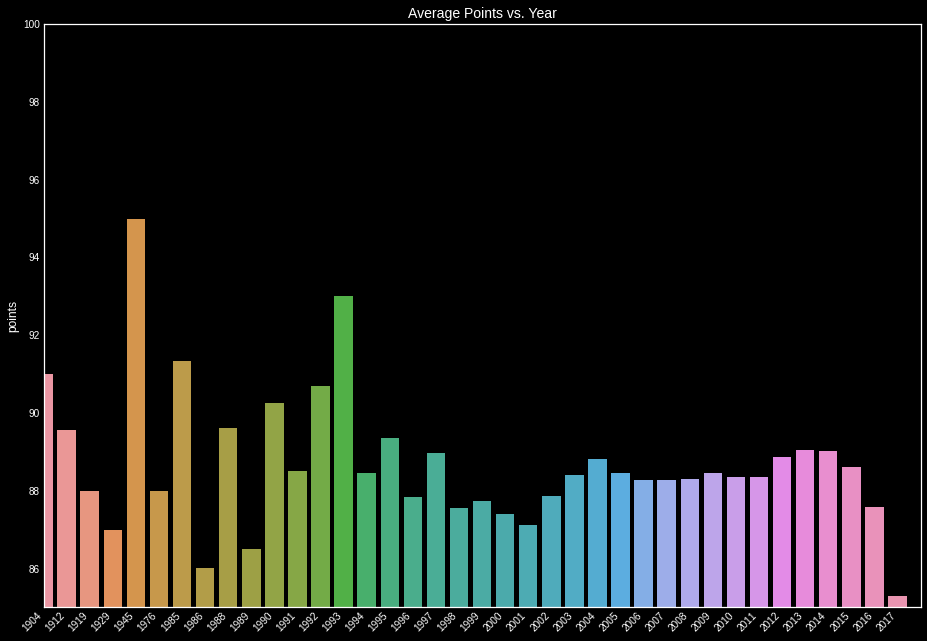

                winery
country               
US               38573
France           15948
Italy             9112
Portugal          3197
Chile             2891
Spain             2755
Argentina         2570
Austria           1892
Germany           1573
New Zealand       1121
Australia         1028
South Africa       727
Israel             320
Canada             176
Greece             139
Bulgaria            93
Romania             80
England             62
Slovenia            42
Mexico              38
Hungary             35
Moldova             35
Uruguay             33
Turkey              33
Lebanon             28
Brazil              28
Morocco             21
Georgia             12
Croatia             12
Ukraine             11
Peru                 8
Cyprus               6
Macedonia            5
Luxembourg           5
Switzerland          5
Serbia               4
Czech Republic       3
India                1
Number of countries: 38
                     points
user_name                  


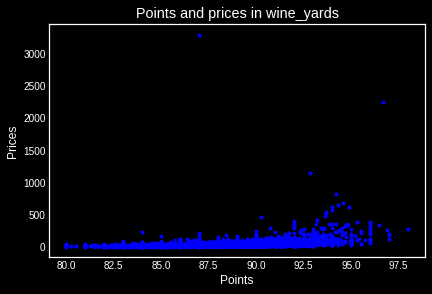

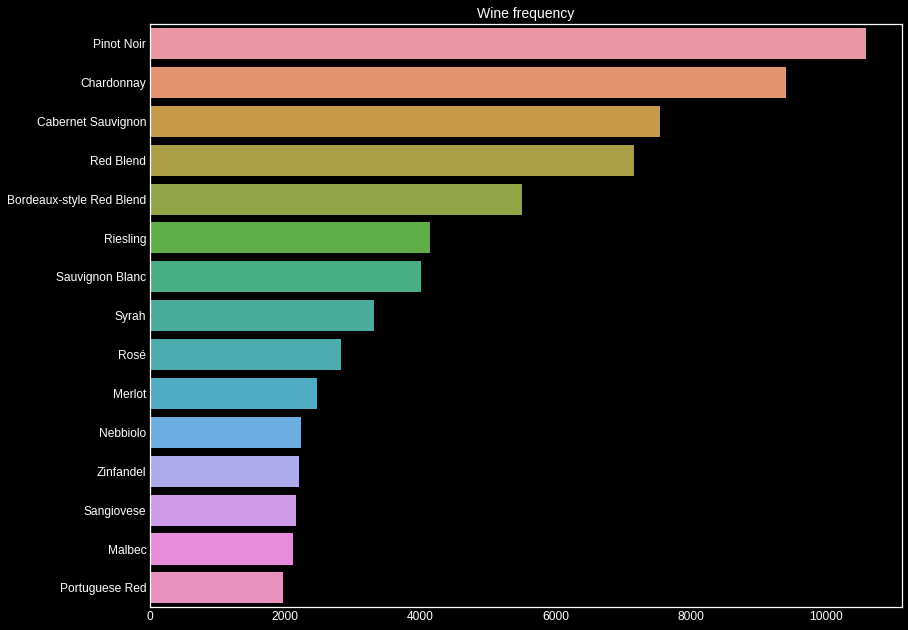

In [0]:
#Actionable insights
# Removing entries having no year value
winesdf_year = winesdf
winesdf_year = winesdf_year.dropna(subset=['year'])
print('Removed ' + str(winesdf.shape[0]-winesdf_year.shape[0]) + ' rows with empty year values.' + "\n")
winesdf_year['year'] = winesdf_year['year'].astype(int)
winesdf_year['year'].describe()

dfWineYear = winesdf_year.groupby(['year']).mean()
print(dfWineYear)
dfWineYear = pd.DataFrame(data=dfWineYear).reset_index()
style.use("dark_background")
plt.figure(figsize=(14,10))
ax = sns.barplot(y=dfWineYear['points'], x=dfWineYear['year'])
plt.title("Average Points vs. Year", fontsize=14)
plt.xlabel("")
ax.set(
    xlim=(0, len(dfWineYear)), 
    ylim=(85, 100)
)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
)

plt.show()
#====================================================================

wine_yards = winesdf[["winery", "points", "price"]].groupby("winery").mean()
points = wine_yards["points"]
prices = wine_yards["price"]
plt.plot(points, prices, "b.")
plt.title("Points and prices in wine_yards")
plt.xlabel("Points")
plt.ylabel("Prices")


countries = winesdf[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
print(countries)
print( "Number of countries: " + str(len(countries)) )


tasters = winesdf[ ["user_name", "points"] ].groupby(by="user_name").mean()[::-1]
print(tasters)

label_freq = winesdf['variety'].apply(lambda s: str(s)).explode().value_counts().sort_values(ascending=False)
print(label_freq)
print(type(label_freq))
print()
print(list(label_freq.index))
# Bar plot
style.use("dark_background")
plt.figure(figsize=(12,10))
sns.barplot(y=label_freq.index.values, x=label_freq, order=label_freq.iloc[:15].index)
plt.title("Wine frequency", fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [0]:
# Extracting feature : vintage
years = []    
for value in winesdf['review_title']:
    regresult = re.search(r'19\d{2}|20\d{2}', value)
    if regresult:
        years.append(regresult.group())
    else: years.append(None)

winesdf['year'] = years
print("We extracted %d years from the wine titles and %d did not have a year." %(len(winesdf[winesdf['year'].notna()]), len(winesdf[winesdf['year'].isna()].index)))
winesdf['year']on https.describe()

# Preprocessing to remove useless entries
processor = winesdf[[ 'review_description', 'year', 'variety', 'province' ]]
print(processor.isnull().sum())
print()
print(processor[processor['variety'].isna()].head(10))
processor = processor.dropna(subset=['review_description', 'variety'])
print('Removed ' + str(winesdf.shape[0]-processor.shape[0]) + ' rows with empty values.' + "\n")

for i in range(1,5):
    print(processor['variety'].iloc[i])
    print(processor['review_description'].iloc[i])
    print()


We extracted 80129 years from the wine titles and 2528 did not have a year.
review_description       0
year                  2528
variety                  0
province                35
dtype: int64

Empty DataFrame
Columns: [review_description, year, variety, province]
Index: []
Removed 0 rows with empty values.

Red Blend
This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of deliciousness that is hard to resist.

Nebbiolo
Barolo Conca opens with inky dark concentration and soothing aromas of black fruit, spice, cola, plum, prune and dried lavender buds. The nose presents those ethereal and delicate aromas, but in the mouth, it delivers thicker flavors of chocolate and mocha. Drink after 2018.

Bordeaux-style White Blend
It's impressive what a small addition of Sauvignon Gris and Muscadelle can do to a Sauvignon-Sémillon blend—it turns this into an exo

In [0]:
input_data_train = processor['review_description'].str.lower()
input_data_test = winesdf_test['review_description'].str.lower()
list_train = []
list_test = []
# Remove stopwords
for phase_word in input_data_train:
    list_train.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
for phase_word in input_data_test:
    list_test.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))

# train and test list
input_data_train = list_train
input_data_test = list_test
list_test = []
list_train = []

print("Input Data Characeristics:\n")
print(input_data_train[3], type(input_data_train), len(input_data_train))
maxLen = len(max(input_data_train, key=len).split())
print("Maximum Length of a review: " + str(maxLen))

uniqueWords = list(set(" ".join(input_data_train).lower().split(" ")))
count = len(uniqueWords)
print("Count of unique words in reviews: " + str(count))

label_words = list(label_freq.index)
num_labels = len(label_words)
print("There are total "  + str(num_labels) + " different categories.")

Input Data Characeristics:

impressive small addition sauvignon gris muscadelle sauvignonsémillon blendit turns exotic wine spice lychee flavors <class 'list'> 82657
Maximum Length of a review: 76
Count of unique words in reviews: 35483
There are total 28 different categories.


In [0]:
# length of dictionary
VOCAB_LEN = count
# Length of each review
SEQ_LEN = maxLen

In [0]:
# Tokenize input data
def tokenise_data(input_data):

  tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = VOCAB_LEN, oov_token='<UNK>')
  tokenizer.fit_on_texts(input_data)
  #word_index = tokenizer.word_index
  #print(dict(list(word_index.items())[0:10]))
  wine_seqs = tokenizer.texts_to_sequences(input_data)
  wine_seqs = tf.keras.preprocessing.sequence.pad_sequences(wine_seqs, maxlen = SEQ_LEN, padding="post")
  return wine_seqs, tokenizer

input_data, tokenizer = tokenise_data(input_data_train)
print(type(input_data), input_data.shape, input_data[1, :])
X_test = tokenise_data(input_data_test)

<class 'numpy.ndarray'> (82657, 76) [   2  988  831  882   82   65   85   31   52    6  341    4   39   11
   69  116   96 8426    3  550  331 1869  248 2958    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [0]:
# Tokenize output data
def tokenize_labels(input_labels):
  label_tokenizer = tf.keras.preprocessing.text.Tokenizer(split=' ', filters='!"#$%&()*+,./:;<=>?@[\\]^`{|}~\t\n')
  label_tokenizer.fit_on_texts(input_labels)
  print(label_tokenizer.word_index)
  wine_labels_seq = np.array(label_tokenizer.texts_to_sequences(input_labels))
  return wine_labels_seq, label_tokenizer

wine_labels = pd.DataFrame({'variety': processor['variety']})
wine_labels = wine_labels.replace(' ', '_', regex=True)
train_labels_list = []
for item in wine_labels['variety']:
    train_labels_list.append(str(item))

output_labels, label_tokenizer = tokenize_labels(train_labels_list)

{'pinot_noir': 1, 'chardonnay': 2, 'cabernet_sauvignon': 3, 'red_blend': 4, 'bordeaux-style_red_blend': 5, 'riesling': 6, 'sauvignon_blanc': 7, 'syrah': 8, 'rosé': 9, 'merlot': 10, 'nebbiolo': 11, 'zinfandel': 12, 'sangiovese': 13, 'malbec': 14, 'portuguese_red': 15, 'white_blend': 16, 'sparkling_blend': 17, 'tempranillo': 18, 'rhône-style_red_blend': 19, 'pinot_gris': 20, 'champagne_blend': 21, 'cabernet_franc': 22, 'grüner_veltliner': 23, 'portuguese_white': 24, 'pinot_grigio': 25, 'bordeaux-style_white_blend': 26, 'gewürztraminer': 27, 'gamay': 28}


In [0]:
# Divide into two
X_train, X_val, y_train, y_val = sk.train_test_split(input_data,
                                                    output_labels,
                                                    test_size=0.20,
                                                    random_state=42)

print('Val: ' + str(len(X_val)) + ' Train: ' + str(len(X_train)))

X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
y_train = y_train.astype("float32")
y_val = y_val.astype("float32")

print(type(X_train), X_train.shape)

# X_train = X_train / 1024.0
# X_val = X_val / 1024.0
# y_train = y_train / 1024.0
# y_val = y_val / 1024.0

print(X_train.shape)
print(y_train.shape)

Val: 16532 Train: 66125
<class 'numpy.ndarray'> (66125, 76)
(66125, 76)
(66125, 1)


In [0]:
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


reverse_label_index = dict([(value, key) for (key, value) in label_tokenizer.word_index.items()])

def decode_label(text):
    return ' '.join([reverse_label_index.get(i, '?') for i in text])

In [0]:
test_entry= 54

print(decode_article(X_train[test_entry,:]))
print('---')
print(X_train[test_entry, :])

print(decode_label(y_train[test_entry, :]))
print('---')
print(y_train[test_entry, :])

nose expressive eventually reveals leather berry easygoing palate shows fruity notes wild cherry raspberry hint kitchen spice simple fresh enjoy soon ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
[  20.  841. 1782.  729.  108.   22.  628.    5.   36.   43.   15.  151.
   11.   49.   90. 3162.   16.  168.   21.  319.  390.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
red_blend
---
[4.]


In [0]:
EMBEDDING_SIZE = SEQ_LEN
EMBEDDING_SIZE_2 = 64
EMBEDDING_SIZE_3 = (num_labels+1)
BATCH_SIZE = 64
EPOCHS = 10
LR = 1e-5

In [0]:
model = tf.keras.Sequential([
    # Add an Embedding layer
    tf.keras.layers.Embedding(VOCAB_LEN, EMBEDDING_SIZE),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.Dropout(0.7), 
    tf.keras.layers.GlobalMaxPooling1D(),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    # Add a Dense layer with additional units and softmax
    tf.keras.layers.Dense(EMBEDDING_SIZE_3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 76)          2696708   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         48768     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 29)               

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
checkpoint_dir = './KnightData/classifer_training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    monitor='accuracy',
    save_best_only=True,
    mode='auto',
    save_weights_only=True)

In [0]:
history = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs  =EPOCHS,
                    validation_data=(X_val, y_val),
                    validation_steps = 30,
                    callbacks = [checkpoint_callback])

loss, accuracy = model.evaluate(X_val, y_val)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/10
517/517 [==============================] - 14s 26ms/step - loss: 2.3563 - accuracy: 0.3275 - val_loss: 1.9660 - val_accuracy: 0.5260
Epoch 2/10
517/517 [==============================] - 14s 27ms/step - loss: 1.5284 - accuracy: 0.5347 - val_loss: 1.6259 - val_accuracy: 0.6383
Epoch 3/10
517/517 [==============================] - 14s 27ms/step - loss: 1.2632 - accuracy: 0.6101 - val_loss: 1.4454 - val_accuracy: 0.6630
Epoch 4/10
517/517 [==============================] - 14s 27ms/step - loss: 1.1213 - accuracy: 0.6550 - val_loss: 1.3844 - val_accuracy: 0.6698
Epoch 5/10
517/517 [==============================] - 14s 27ms/step - loss: 1.0095 - accuracy: 0.6879 - val_loss: 1.2973 - val_accuracy: 0.6747
Epoch 6/10
517/517 [==============================] - 14s 27ms/step - loss: 0.9277 - accuracy: 0.7121 - val_loss: 1.2503 - val_accuracy: 0.6729
Epoch 7/10
517/517 [==============================] - 14s 27ms/step - loss: 0.8567 - accuracy: 0.7323 - val_loss: 1.2221 - val_accuracy:

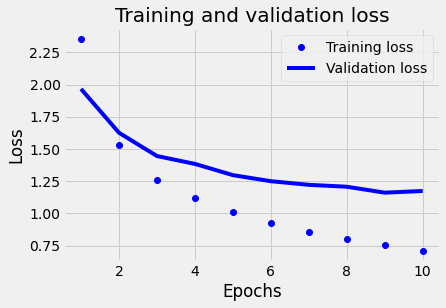

In [0]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


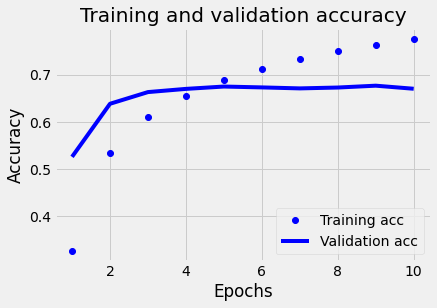

In [0]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [0]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = tokenizer.texts_to_sequences(sample_pred_text)
  print(encoded_sample_pred_text)
  print(type(encoded_sample_pred_text))

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, SEQ_LEN)
    
  encoded_sample_pred_text = np.array(encoded_sample_pred_text)
  encoded_sample_pred_text = encoded_sample_pred_text.astype("float32")
  predictions = model.predict(encoded_sample_pred_text)